<a href="https://colab.research.google.com/github/SIMA-SOIL/SIMA-SOIL/blob/main/time%20series%20charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

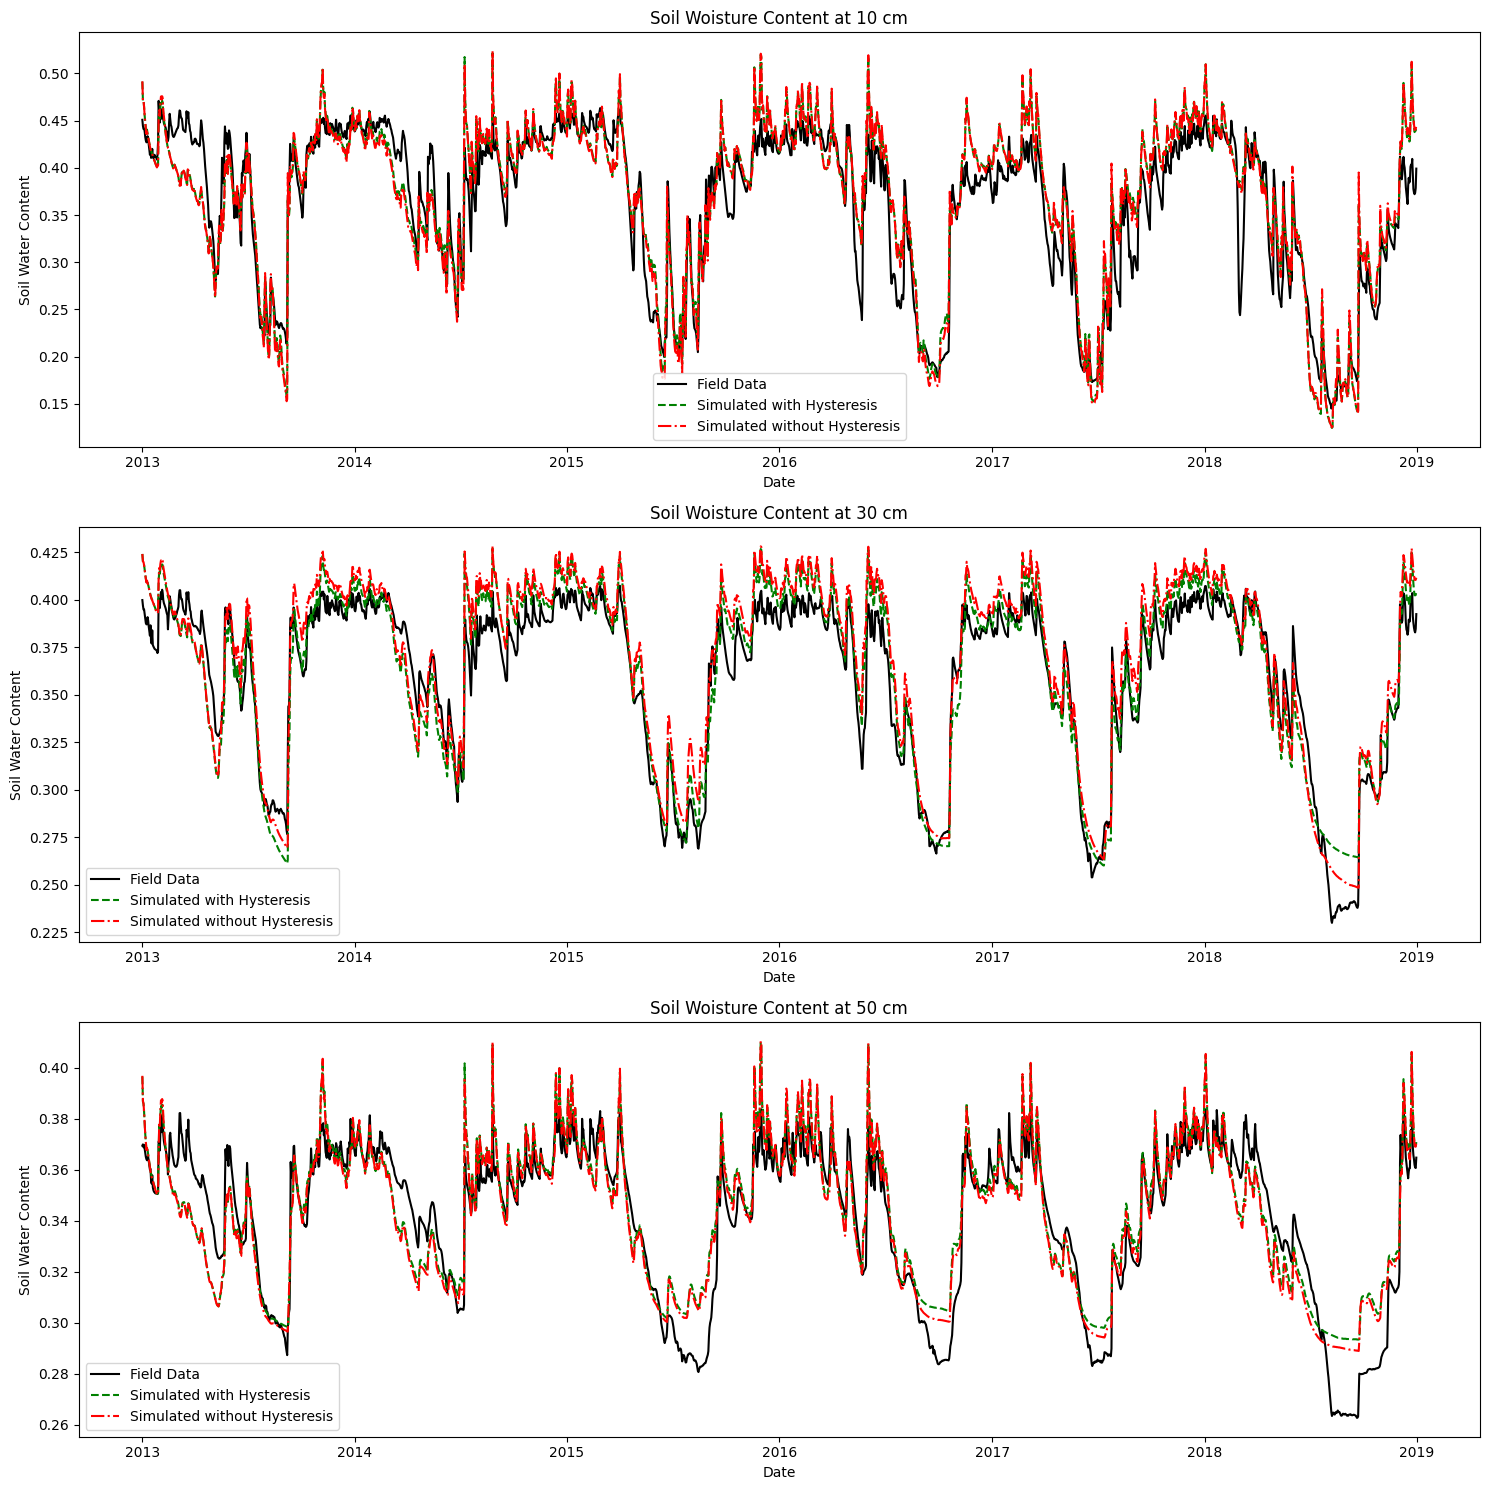

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel files
#data_file_path = 'path_to_your_data_file/Data.xlsx'
#hdata_file_path = 'path_to_your_hdata_file/HData.xlsx'
#nhdata_file_path = 'path_to_your_nhdata_file/NHData.xlsx'

data_df = pd.read_excel('Data.xlsx')
hdata_df = pd.read_excel('HData.xlsx')
nhdata_df = pd.read_excel('NHData.xlsx')

# Convert Year, Month, Day to a single datetime column for easier plotting
data_df['Date'] = pd.to_datetime(data_df[['Year', 'Month', 'Day']])
hdata_df['Date'] = pd.to_datetime(hdata_df[['Year', 'Month', 'Day']])
nhdata_df['Date'] = pd.to_datetime(nhdata_df[['Year', 'Month', 'Day']])

# Plotting time series for each depth
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

depths = ['SWC10', 'SWC30', 'SWC50']
titles = ['Soil Woisture Content at 10 cm', 'Soil Woisture Content at 30 cm', 'Soil Woisture Content at 50 cm']

for i, depth in enumerate(depths):
    axs[i].plot(data_df['Date'], data_df[depth], label='Field Data', color='black')
    axs[i].plot(hdata_df['Date'], hdata_df[depth], label='Simulated with Hysteresis', linestyle='--', color='green')
    axs[i].plot(nhdata_df['Date'], nhdata_df[depth], label='Simulated without Hysteresis', linestyle='dashdot', color='red')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Soil Water Content')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [13]:
# Load the data from the new Excel files with multiple sheets
field_sheets = pd.read_excel('SMM_Field.xlsx', sheet_name=None)
hysteresis_sheets = pd.read_excel('SMM_Hysteresis.xlsx', sheet_name=None)
nohysteresis_sheets = pd.read_excel('SMM_NoHysteresis.xlsx', sheet_name=None)

# Extract the sheet names
field_sheet_names = list(field_sheets.keys())
hysteresis_sheet_names = list(hysteresis_sheets.keys())
nohysteresis_sheet_names = list(nohysteresis_sheets.keys())

field_sheet_names, hysteresis_sheet_names, nohysteresis_sheet_names



(['SWC10', 'SWC30', 'SWC50'],
 ['SWC10', 'SWC30', 'SWC50'],
 ['SWC10', 'SWC30', 'SWC50'])

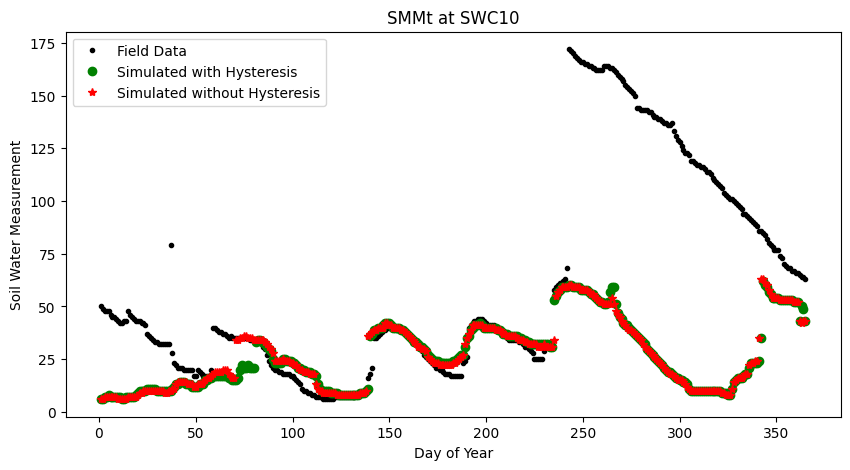

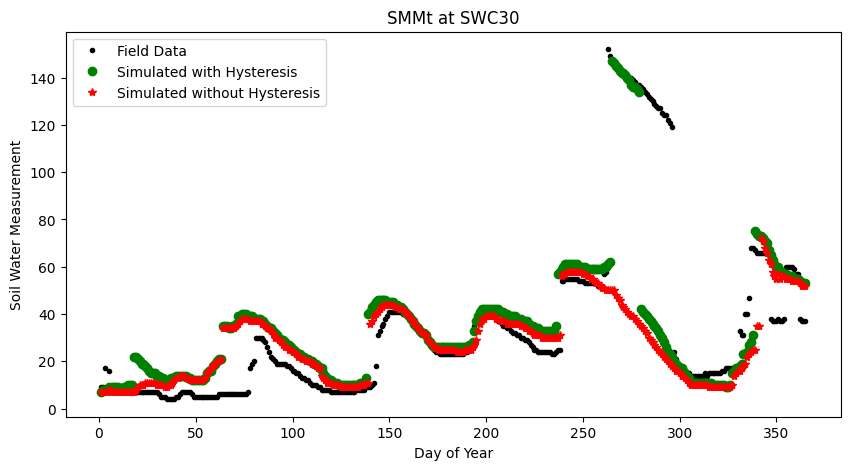

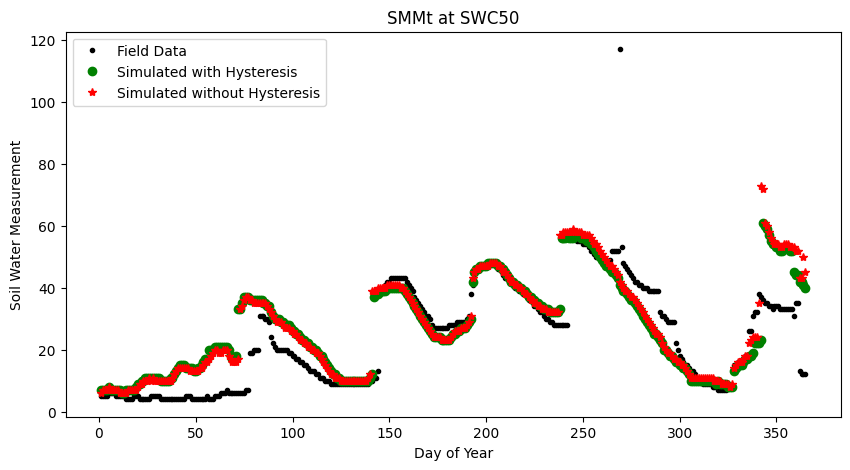

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

field_sheets = pd.read_excel('SMM_Field.xlsx', sheet_name=None)
hysteresis_sheets = pd.read_excel('SMM_Hysteresis.xlsx', sheet_name=None)
nohysteresis_sheets = pd.read_excel('SMM_NoHysteresis.xlsx', sheet_name=None)

# Extract the sheet names
sheet_names = list(field_sheets.keys())

# Plotting time series for each depth separately
for sheet in sheet_names:
    field_df = field_sheets[sheet]
    hysteresis_df = hysteresis_sheets[sheet]
    nohysteresis_df = nohysteresis_sheets[sheet]

    plt.figure(figsize=(10, 5))
    plt.plot(field_df['DoY'], field_df['t_SMM'], label='Field Data', marker='.', linestyle='', color='black')
    plt.plot(hysteresis_df['DoY'], hysteresis_df['t_SMM'], label='Simulated with Hysteresis', color='green', marker='o', linestyle='')
    plt.plot(nohysteresis_df['DoY'], nohysteresis_df['t_SMM'], label='Simulated without Hysteresis', marker='*', linestyle='', color='red')
    plt.title(f'SMMt at {sheet}')
    plt.xlabel('Day of Year')
    plt.ylabel('Soil Water Measurement')
    plt.legend()
    plt.show()
